In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
df.shape

(768, 9)

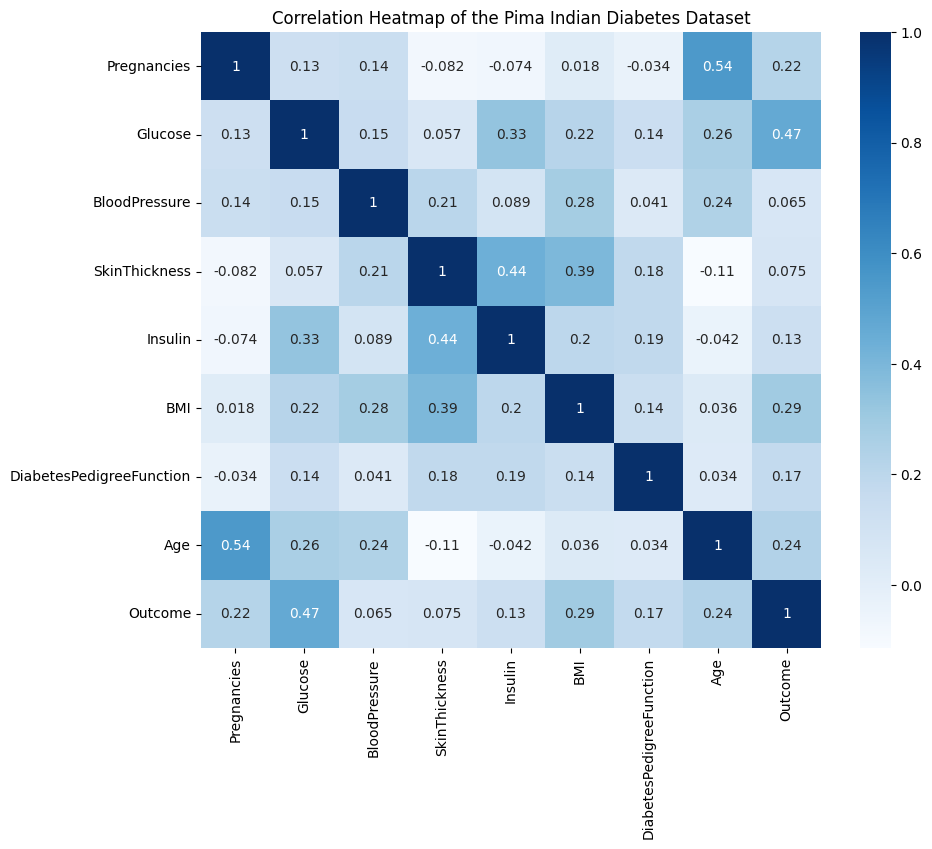

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="Blues", annot=True)
plt.title('Correlation Heatmap of the Pima Indian Diabetes Dataset')
plt.show()

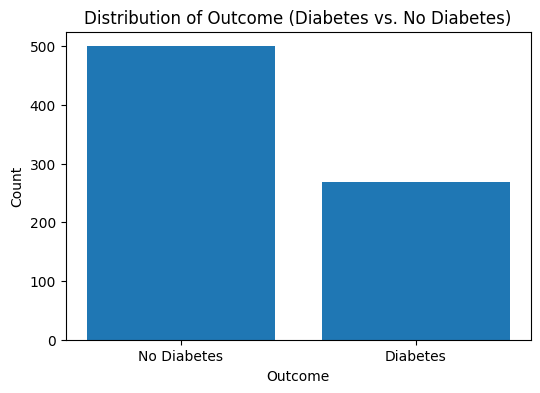

In [13]:
outcome_counts = df['Outcome'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(outcome_counts.index, outcome_counts.values, tick_label=['No Diabetes', 'Diabetes'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome (Diabetes vs. No Diabetes)')

# Show the plot
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
features=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
label=df["Outcome"]

x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=42)

In [31]:
#now i will teach you how can split your data by our own
x_train1=df[:450]
y_train1=df[:450]
x_test1=df[450:]
y_test1=df[450:]
print(f" the length of data for traing is : {len(x_train1)}")

print(f" the length of data for test  is :{len(x_test1)}")

 the length of data for traing is : 450
 the length of data for test  is :318


In [32]:
# that is cool i will use the  first split because it's common use ;)
# i will transfom the type of data to tensor because we will build a MLP with pytorch
#let's check the type of our data
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [33]:
print(f" the length of data for traing is : {len(x_train)}")

print(f"the length of data for test  is :{len(x_test)}")

 the length of data for traing is : 614
the length of data for test  is :154


In [34]:
# so we need to trosform our data to numpy array then tensor let's do that together ;)
import numpy as np
x_train=np.array(x_train)
y_train=np.array(y_train)

x_test=np.array(x_test)
y_test=np.array(y_test)

print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [35]:
#build multi layer perceptron with one hidden layer we have 8 input in our dataset not 4
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(0)

# Here's a simple MLP
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(8, 5)
        self.fc2 = nn.Linear(5, 3)
        self.fc3 = nn.Linear(3, 2)

    def forward(self, x):
        x = x.flatten(1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x
mlp=SimpleMLP()

In [36]:
list(mlp.parameters())

[Parameter containing:
 tensor([[-0.0026,  0.1897, -0.2910, -0.2602, -0.1362,  0.0948, -0.0070,  0.2803],
         [-0.0314,  0.0936, -0.1068, -0.0695, -0.3378, -0.2342, -0.1457,  0.0131],
         [ 0.1398,  0.2121, -0.2397, -0.1540,  0.1284,  0.2936, -0.0728,  0.2646],
         [-0.0570,  0.0374,  0.3201, -0.3280, -0.2226, -0.0895, -0.1378,  0.3055],
         [-0.2292, -0.1628, -0.2470, -0.3311, -0.2064,  0.3039,  0.1578,  0.1714]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0186, -0.1813,  0.0598, -0.3301, -0.2555], requires_grad=True),
 Parameter containing:
 tensor([[-0.2306,  0.2822,  0.2622, -0.1983, -0.0161],
         [ 0.2860,  0.4446,  0.1775,  0.0604,  0.2999],
         [-0.2633,  0.0833, -0.3467, -0.3100, -0.2310]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2024,  0.1799, -0.2649], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1744,  0.3169, -0.0729],
         [ 0.0220,  0.1338,  0.3582]], requires_grad=True),
 Parameter contain

In [37]:
# create a loss function
loss_fn=nn.CrossEntropyLoss()
# create optimizer
optimizer=torch.optim.Adam(params=mlp.parameters(),lr=0.001)